# Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
from matplotlib import pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

/Users/jonad/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


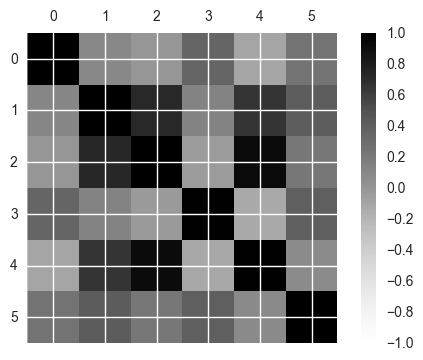

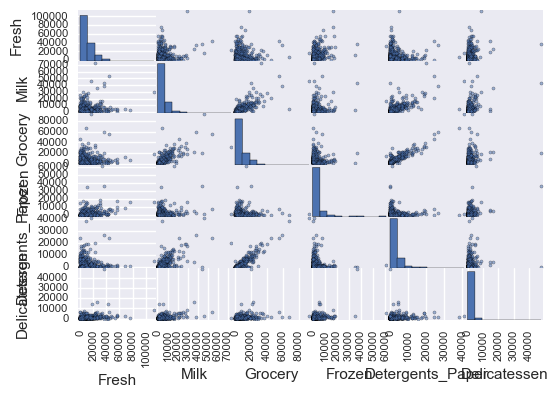

In [2]:
# Display a description of the dataset
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix
display(data.describe())
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)

scatter_matrix(data)
pyplot.show()

### Implementation: Selecting Samples and try to predict their class.

In [3]:
# Select some indices.
indices = [10, 50, 75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,6269,1095,1980,3860,609,2162
2,20398,1137,3,4407,3,975


Intuitively, given the statistics:
- Customer at index 0 could be a cafe/restaurant : “Detergents_Paper” and “Grocery” spendings are above the 75th percentile, “Milk” and “Delicatessen” spendings are between the median and the 75th percentile, and “Fresh” and “Frozen” spendings are between the 25th percentile and the median.

- Customer at index 1 could be retailer: “Fresh” and “Detergents_Paper” spendings are between the 25th percentile and the median, “Milk” and “Grocery” spendings are below the 25th percentile, “Frozen” and “Delicatessen” spendings are above the 75th percentile.

- Customer at index 2 could be a market: “Fresh” spendings are above the 75th percentile, “Milk”, “Grocery”, and “Detergents_Paper” spendings are below the 25th percentile, and “Delicatessen” spendings are between between the median and 75th percentile.


### Implementation : 

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame.
target = data['Detergents_Paper']
features = data.drop('Detergents_Paper', axis=1)
seed = 0
# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=seed)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=seed)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

0.72865518125414541

With a prediction score of 0.72, 'Detergents_Paper' variable is not neccessary to identify custimers' spending habits.

### Visualize Feature Distributions


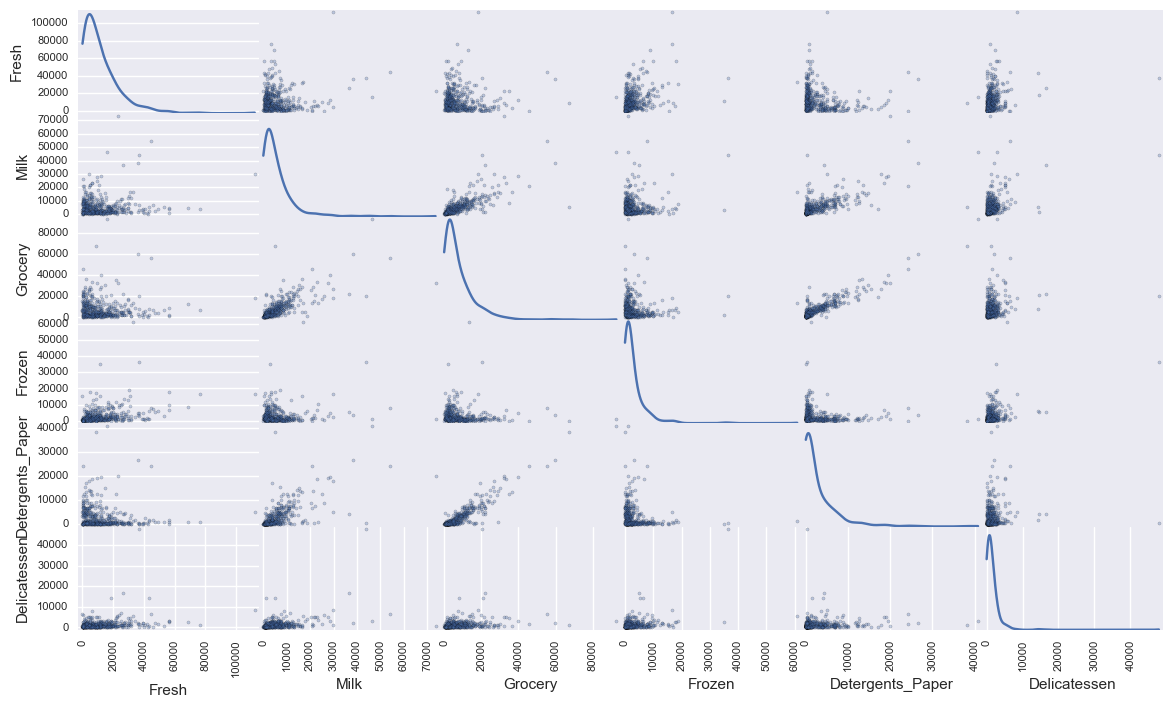

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

From the correlation matrix above, we can infer the following:
- Some pairs of features have positive correlation and are linearly correlated : 
    - 'Detergents_Paper' and 'Grocery' are positively strongly correlated.
    - 'Detergents_Paper' and 'Milk' are positively correlated.
    - 'Milk' and 'Grocery' are positively correlated.
- Each feature has a large number of data points near zero, and a median below the mean, thus right skewed.

## Data Preprocessing

### Implementation: Feature Scaling

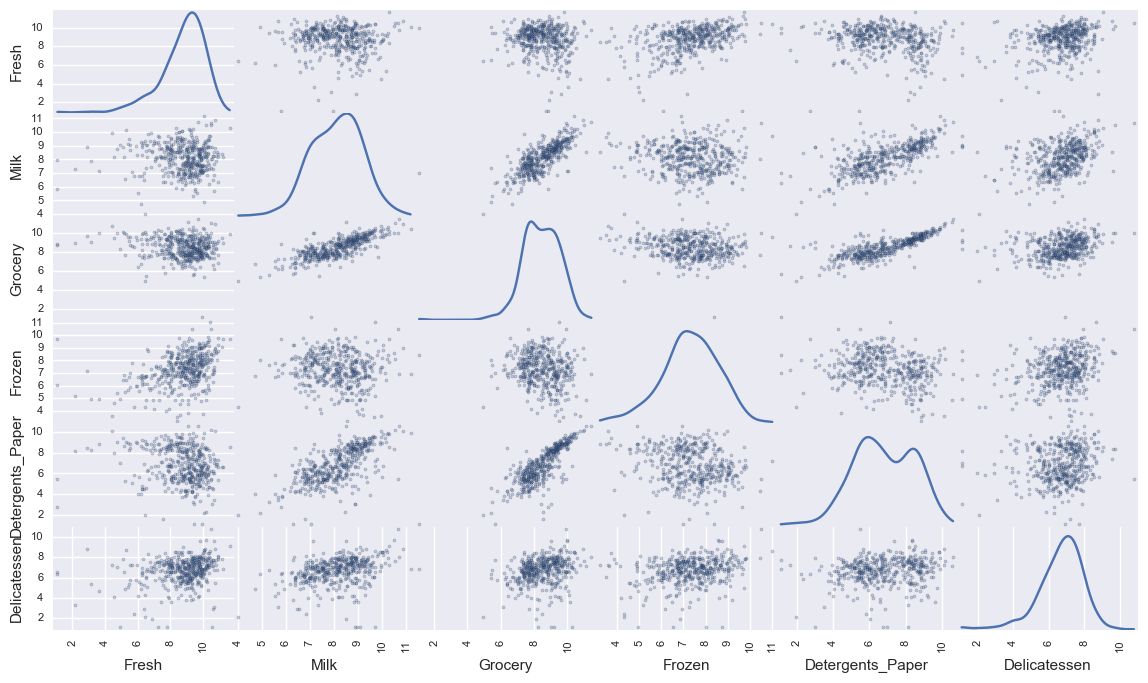

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


### Implementation: Outlier Detection

In [8]:
# For each feature find the data points with extreme high or low values
from collections import Counter
outlier_values = []
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_value = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_values = np.concatenate((outlier_values, outlier_value.index.values), axis=0)
    display(outlier_value)
    
# Select the indices for data points you wish to remove
outlier_values = [int(item) for item in outlier_values]
repeated_outliers = []
counter = Counter(outlier_values)
for el in counter.elements():
    if counter[el] > 1:
        repeated_outliers.append(el)
        
repeated_outliers = list(set(repeated_outliers))
print "Following records are outliers for more than one feature:", repeated_outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[repeated_outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Following records are outliers for more than one feature: [128, 65, 154, 75, 66]


From the data above, about 10% of the data. Removing all the outliers might lead to a loss of information. However 5 data points appears -65, 66, 75, 154, 128 - in more than 1 features, and we can remove them.

## Feature Transformation

### Implementation: PCA

array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

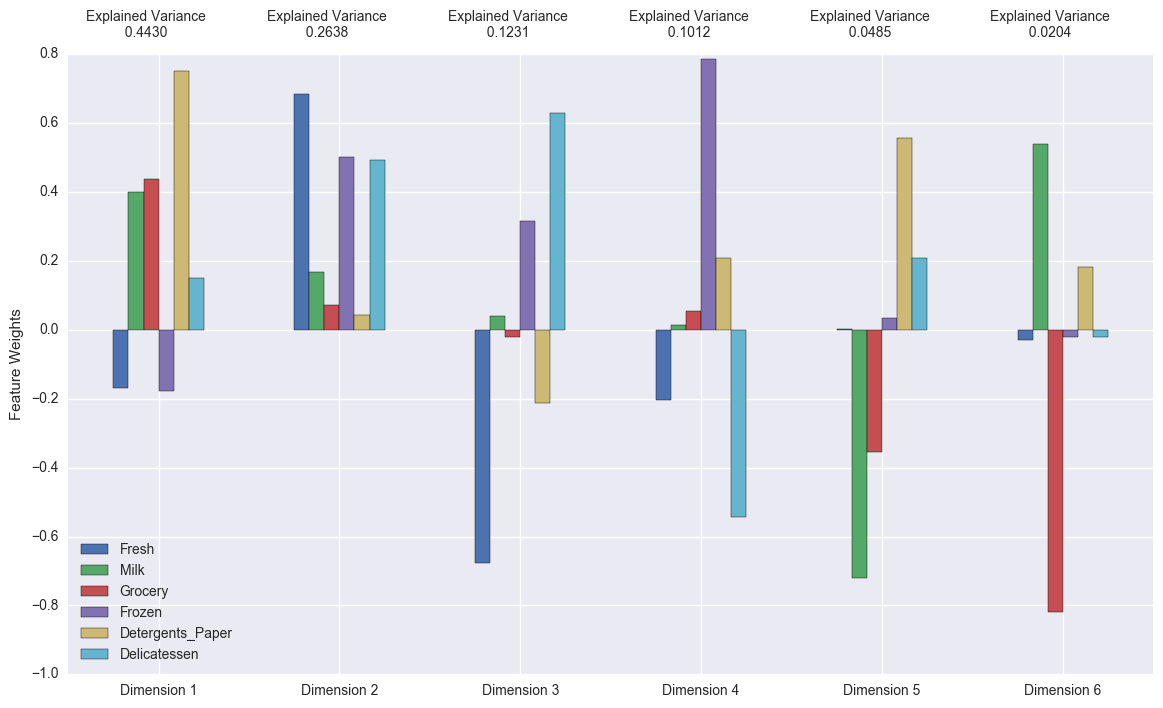

In [9]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)
# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
np.cumsum(pca.explained_variance_ratio_)


- The variance explained in total by the first 4 principal components is: 0.93.
- Dimension 1 is strongly positively correlated with “Detergents_Paper”, and “Grocery”. It correlates most strongly with “Detergents_Paper”.  Thus it increases with increasing “Detergents_Paper”, and “Grocery”.  The type of customer with high value of dimension 1 is likely a restaurant/cafe.
- Dimension 2 is strongly positively correlated with “Fresh”, "Frozen", and "Delicatessen". It increases with increasing “Fresh”, "Frozen" and "Delicatessen". Thus the type of customer with high value of dimension 2 is likely a market.
- Dimension 3 is positively correlated with “Delicatessen”,  and negatively correlated with “Fresh”. It increases with an increasing “Delicatessen” and a decreasing “Fresh”.  
- Dimension 4 is strongly positively correlated with “Frozen” and negatively correlated with “Delicatessen”. It increases with an increasing “Frozen” and a decreasing “Delicatessen”.

### Observation


In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0887,0.7006,0.8537,1.0105,0.5587,-0.2495
1,-1.1404,0.6710,0.9823,0.0603,1.1423,-0.0055
2,-8.3026,0.4747,0.9774,-1.1195,0.2977,4.3514


### Implementation: Dimensionality Reduction

In [11]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation


In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0887,0.7006
1,-1.1404,0.6710
2,-8.3026,0.4747


## Visualizing a Biplot

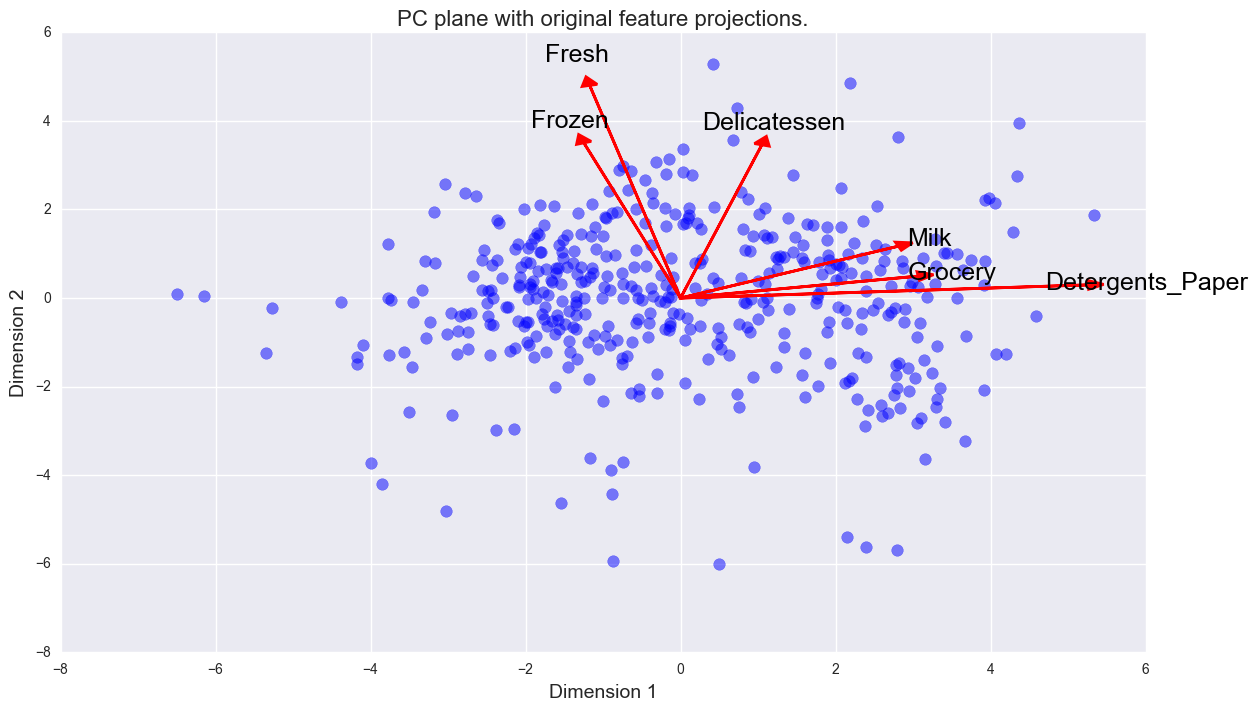

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation


- Detergents_Paper is strongly correlated with the first dimension.
- Fresh is strongly correlated with the second dimension.

## Clustering

Two main algorithms are commonly used for clustering:
    - KMeans
    - Gaussian Mixture

- Advantages of using KMeans:
    - Assign each observation to a specific cluster.
    - always converge to the local optimum.
    - Simple to use and implement.
    - Works very well with large datasets.

- Advantages of Gaussian Mixture Model:
   - provide soft assignments of observations to clusters.
   - always converge.
   - Works with any distribution.
   
- Since the problem here is to assign each observation to a specific cluster, we will use KMeans.
   

### Implementation: Creating Clusters

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GMM


clusters = [2,3,4,5,6,7,8,9,10]
kmeans_msg = []


for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(reduced_data)
    preds = kmeans.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    msg = "cluster = {} Average score = {}".format(cluster, score)
    kmeans_msg.append(msg)
    
for msg in kmeans_msg:
    print msg
    
clusterer = KMeans(n_clusters=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=0)


cluster = 2 Average score = 0.426281015469
cluster = 3 Average score = 0.397138208845
cluster = 4 Average score = 0.331256525802
cluster = 5 Average score = 0.350990778931
cluster = 6 Average score = 0.363241134188
cluster = 7 Average score = 0.364530437237
cluster = 8 Average score = 0.355338459806
cluster = 9 Average score = 0.366760367409
cluster = 10 Average score = 0.361131007346


The best silhouette score is 0.426, with a number of cluster of 2.

### Cluster Visualization

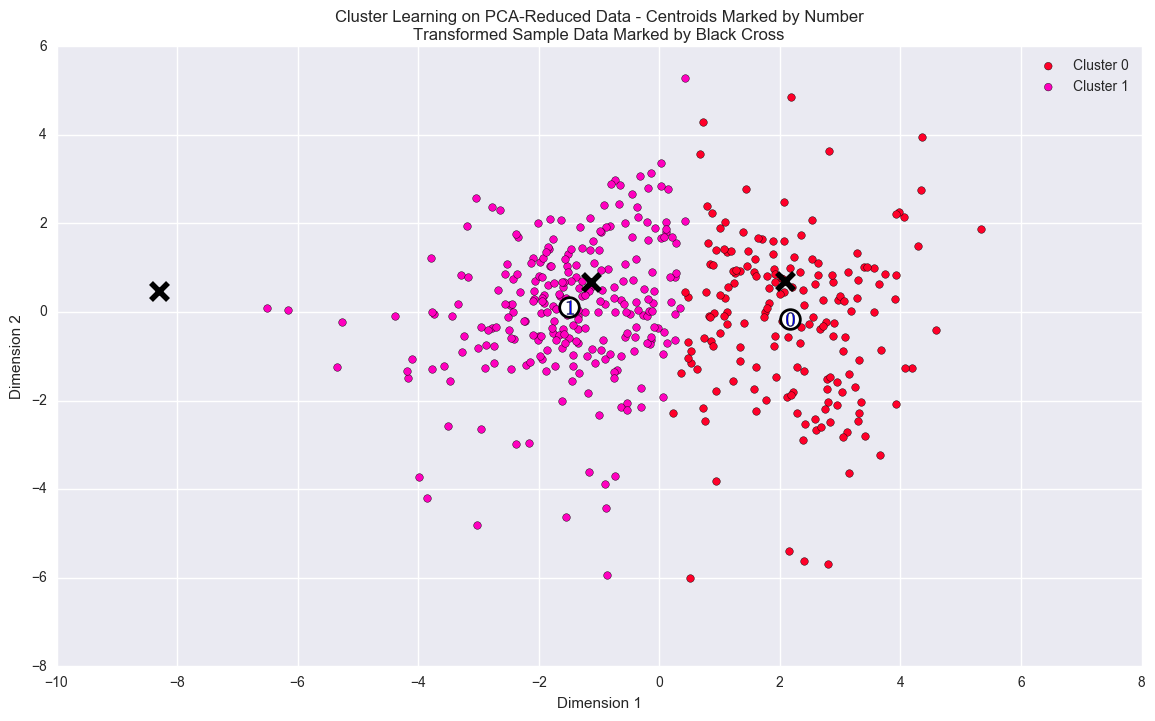

In [15]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


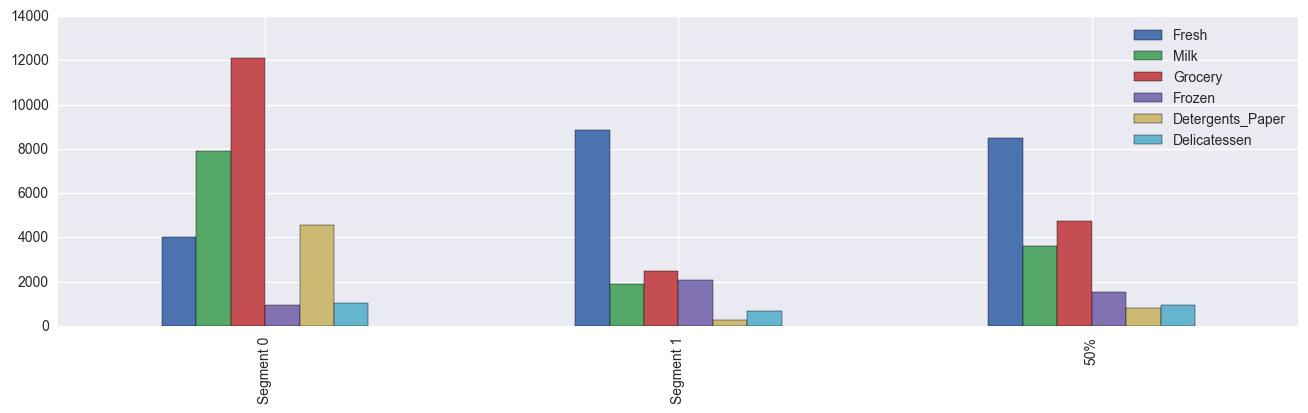

In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

- Segment 1 represents a retailler, since its values of "Fresh" and "Frozen" are above the median.
- Segment 0 represents a restaurant/cafe, since its values of "Grocery", "Milk", and "Detergents_Paper" are above the median.

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


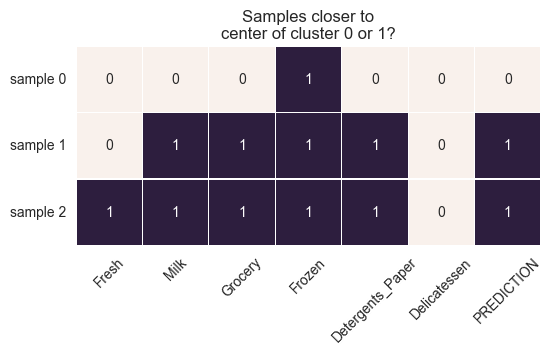

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    

# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncenter of cluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0);

**Answer:**
- Sample point 0 is best represented by the segment 1.
- Sample point 1 is best represented by the segment 0.
- Sample point 2 is best represented by the segment 0.

- For sample 0, the values of "Grocery", "Milk", and "Detergents_Paper" are above the median, and the sample is closer to cluster 1 - the first row from the table above has a value of  1 in most cells -, thus the predicted cluster seems to be consistent with the category spending sample.

- For sample 1, the value of "Fresh" is close to the median and the value of "Frozen" is above the median, and the sample is closer to cluster 0 - the second row from the table above has a value of 0 in most cells -, thus the predicted cluster seems to be consistent with the category spending sample.

- For sample 2, the values of "Fresh" and "Frozen" are above the median, and the sample is closer to cluster 0 - the third row from the table above has a value of 0 in most cells -, thus the predicted cluster seems to be consistent with the category spending sample.



## Conclusion


Intuitively, A change of number of days per week deliveries, might impact negatively some customers. More specifically, customers who buy a lot of fresh products. Any change might result to an additional cost in buying resources to conserve those products. To confirm our intuition, we can perform an A/B test on each customer group.
Futhermore, the wholesale distributor can use the current clustered dataset for supervised learning. Predictor variables will be spendings in these different categories: Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. Target variable will the customer's segment. The dataset can then be used to train a classification model. After the training, the model can then be used to classify new customers.
